In [31]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

### Elementary study of prediction on S&P 500 stock price using Prophet 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
import datetime as dt

In [2]:
train = pd.read_csv('/Users/xlyue/Documents/kaggle learning/S&P 500 stock data/sandp500/all_stocks_5yr.csv')

In [35]:
train.Name.unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [43]:
train.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [3]:
train = train.drop(train.loc[train['open'].isnull()].index)
train = train.drop(train.loc[train['high'].isnull()].index)
train = train.drop(train.loc[train['low'].isnull()].index)

In [4]:
train = train.rename(columns = {'Name': 'ticker'})
amzn = train.loc[train['ticker'] == 'AMZN']
gs = train.loc[train['ticker'] == 'GS']
fb = train.loc[train['ticker'] == 'FB']
ms = train.loc[train['ticker'] == 'MS']

Let's analyze selected stocks of Amazon, Goldman Sachs, Facebook and Morgan Stanley

In [46]:
gs.head()

,date,open,high,low,close,volume,ticker
257578,2013-02-08,150.78,151.970,150.3500,151.60,3612229,GS
257579,2013-02-11,151.42,152.870,150.9601,152.24,3751274,GS
257580,2013-02-12,152.48,154.320,151.7900,154.11,4307556,GS
257581,2013-02-13,154.11,154.850,153.2800,154.52,4368576,GS
257582,2013-02-14,153.84,156.719,153.6200,155.93,5035367,GS


In [5]:
amzn_train = amzn.copy()
gs_train =gs.copy()
fb_train = fb.copy()
ms_train = ms.copy()

amzn_train['date'] = pd.to_datetime(amzn_train.date)
gs_train['date'] = pd.to_datetime(gs_train.date)
fb_train['date'] = pd.to_datetime(fb_train.date)
ms_train['date'] = pd.to_datetime(ms_train.date)

In [48]:
gs_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 257578 to 258836
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
ticker    1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


#### quick visual

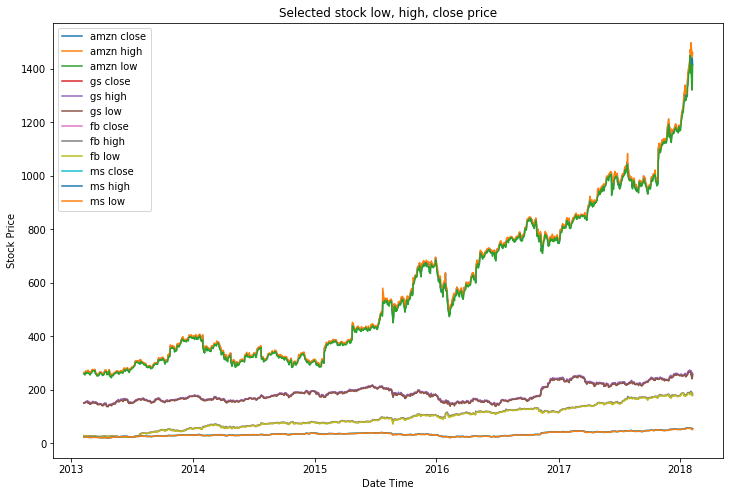

In [49]:
plt.figure(figsize = (12, 8))

plt.plot(amzn_train['date'].values, amzn_train['close'], label = 'amzn close')
plt.plot(amzn_train['date'].values, amzn_train['high'], label = 'amzn high')
plt.plot(amzn_train['date'].values, amzn_train['low'], label = 'amzn low')
plt.plot(gs_train['date'].values, gs_train['close'], label = 'gs close')
plt.plot(gs_train['date'].values, gs_train['high'], label = 'gs high')
plt.plot(gs_train['date'].values, gs_train['low'], label = 'gs low')
plt.plot(fb_train['date'].values, fb_train['close'], label = 'fb close')
plt.plot(fb_train['date'].values, fb_train['high'], label = 'fb high')
plt.plot(fb_train['date'].values, fb_train['low'], label = 'fb low')
plt.plot(ms_train['date'].values, ms_train['close'], label = 'ms close')
plt.plot(ms_train['date'].values, ms_train['high'], label = 'ms high')
plt.plot(ms_train['date'].values, ms_train['low'], label = 'ms low')

plt.title('Selected stock low, high, close price')
plt.xlabel('Date Time')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

#### zoom in lower stock curves

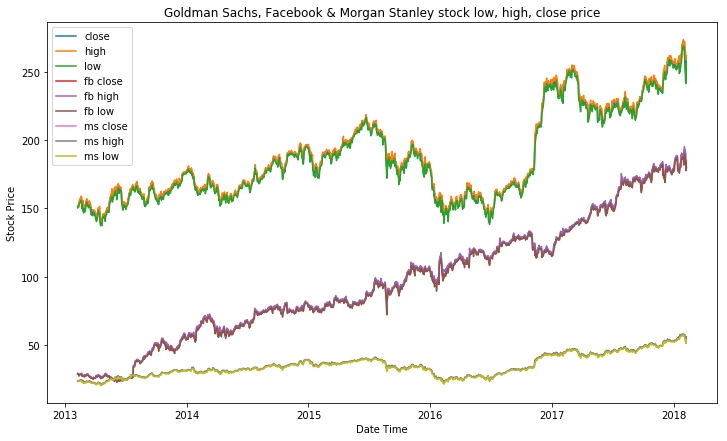

In [51]:
plt.figure(figsize = (12, 7))

plt.plot(gs_train['date'].values, gs_train['close'], label = 'close')
plt.plot(gs_train['date'].values, gs_train['high'], label = 'high')
plt.plot(gs_train['date'].values, gs_train['low'], label = 'low')
plt.plot(fb_train['date'].values, fb_train['close'], label = 'fb close')
plt.plot(fb_train['date'].values, fb_train['high'], label = 'fb high')
plt.plot(fb_train['date'].values, fb_train['low'], label = 'fb low')
plt.plot(ms_train['date'].values, ms_train['close'], label = 'ms close')
plt.plot(ms_train['date'].values, ms_train['high'], label = 'ms high')
plt.plot(ms_train['date'].values, ms_train['low'], label = 'ms low')


plt.title('Goldman Sachs, Facebook & Morgan Stanley stock low, high, close price')
plt.xlabel('Date Time')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

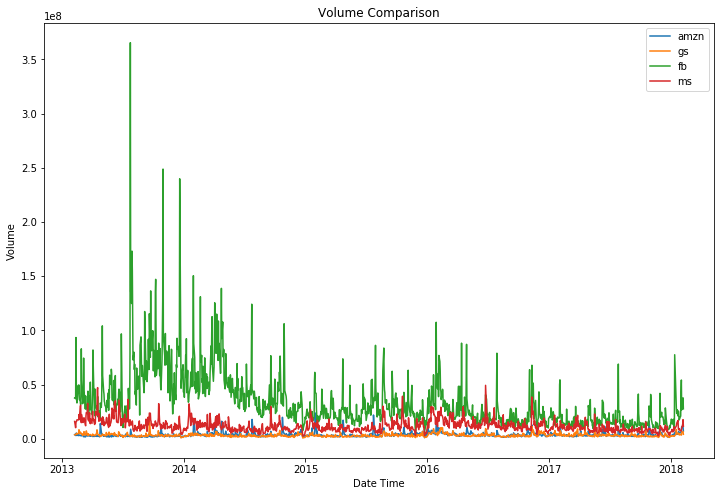

In [52]:
plt.figure(figsize = (12, 8))

plt.plot(amzn_train['date'].values, amzn_train['volume'], label = 'amzn')
plt.plot(gs_train['date'].values, gs_train['volume'], label = 'gs')
plt.plot(fb_train['date'].values, fb_train['volume'], label = 'fb')
plt.plot(ms_train['date'].values, ms_train['volume'], label = 'ms')

plt.title('Volume Comparison')
plt.xlabel('Date Time')
plt.ylabel('Volume')

plt.legend()
plt.show()

#### work with Prophet

In [6]:
# sklearn APi
# but slightly different from traditional API, only include date and prices to fit
m = Prophet()

In [7]:
amzn_train.drop(['open', 'open', 'high', 'low', 'volume', 'ticker'], axis = 1, inplace = True)
amzn_train = amzn_train.rename(columns = {'close': 'y', 'date': 'ds'})
gs_train.drop(['open', 'open', 'high', 'low', 'volume', 'ticker'], axis = 1, inplace = True)
gs_train = gs_train.rename(columns = {'close': 'y', 'date': 'ds'})
fb_train.drop(['open', 'open', 'high', 'low', 'volume', 'ticker'], axis = 1, inplace = True)
fb_train = fb_train.rename(columns = {'close': 'y', 'date': 'ds'})
ms_train.drop(['open', 'open', 'high', 'low', 'volume', 'ticker'], axis = 1, inplace = True)
ms_train = ms_train.rename(columns = {'close': 'y', 'date': 'ds'})

In [8]:
m.fit(amzn_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [9]:
amzn_future = m.make_future_dataframe(periods = 365)
amzn_fc = m.predict(amzn_future)

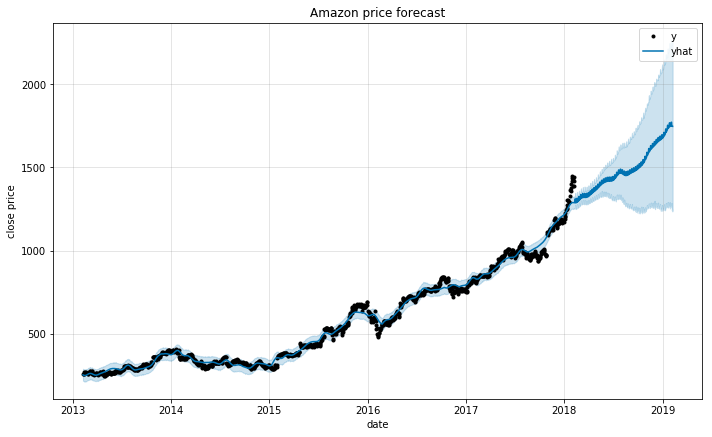

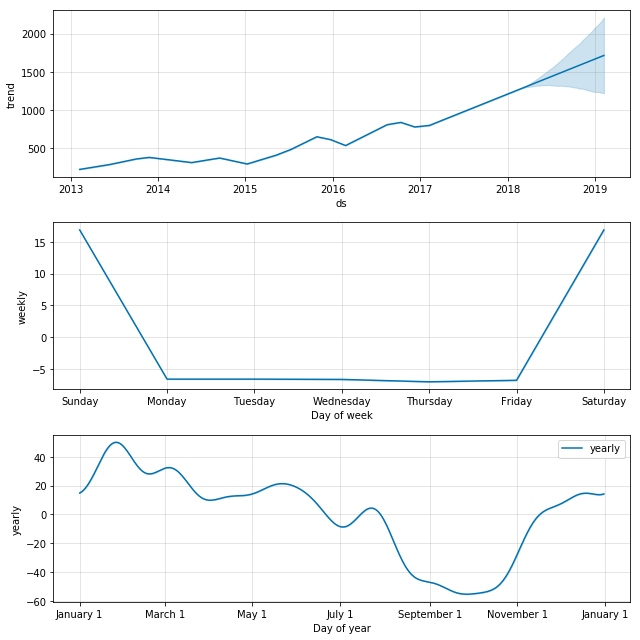

In [10]:
m.plot(amzn_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Amazon price forecast')

plt.legend()
plt.show()


m.plot_components(amzn_fc)
plt.legend()
plt.show()

In [14]:
m = Prophet(changepoint_prior_scale=0.01).fit(amzn_train)
amzn_future_month = m.make_future_dataframe(periods = 12, freq = 'M')
amzn_fc = m.predict(amzn_future_month)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



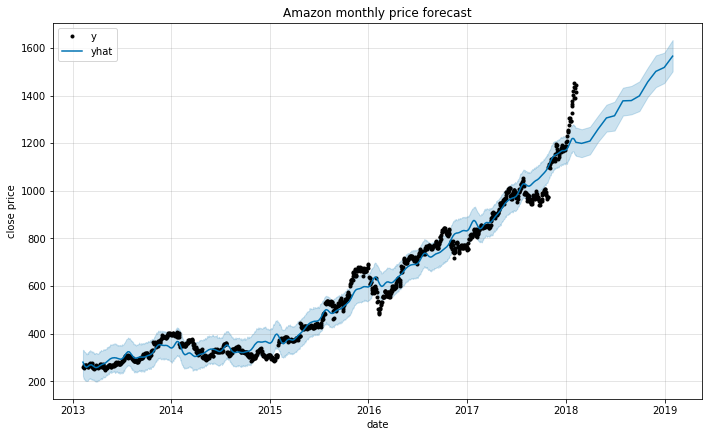

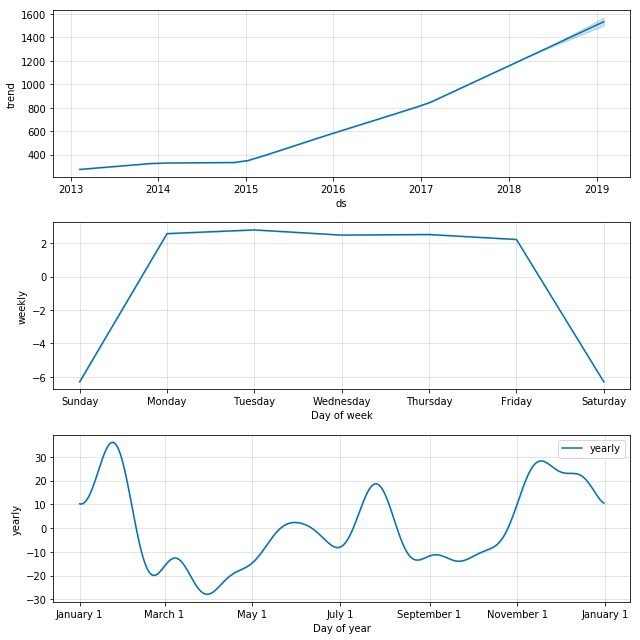

In [15]:
m.plot(amzn_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Amazon monthly price forecast')
plt.legend()
plt.show()


m.plot_components(amzn_fc)
plt.legend()
plt.show()

In [16]:
m = Prophet()
m.fit(gs_train)
gs_future = m.make_future_dataframe(periods = 365)
gs_fc = m.predict(gs_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



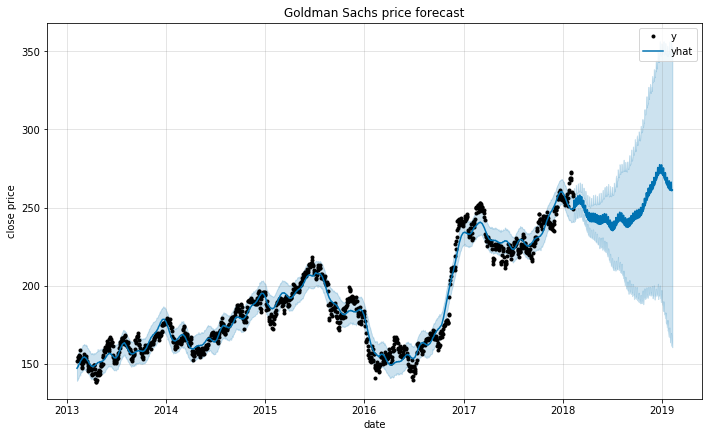

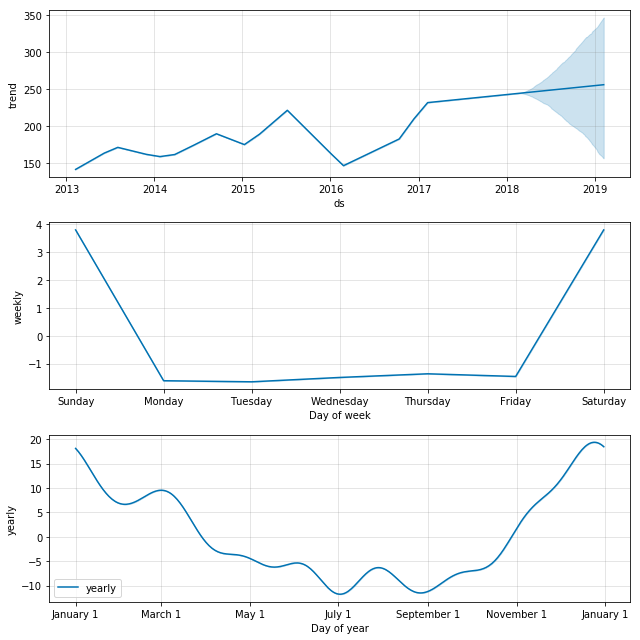

In [17]:
m.plot(gs_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Goldman Sachs price forecast')

plt.legend()
plt.show()


m.plot_components(gs_fc)
plt.legend()
plt.show()

In [18]:
m = Prophet(changepoint_prior_scale=0.01).fit(gs_train)
gs_future_month = m.make_future_dataframe(periods = 12, freq = 'M')
gs_fc = m.predict(gs_future_month)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



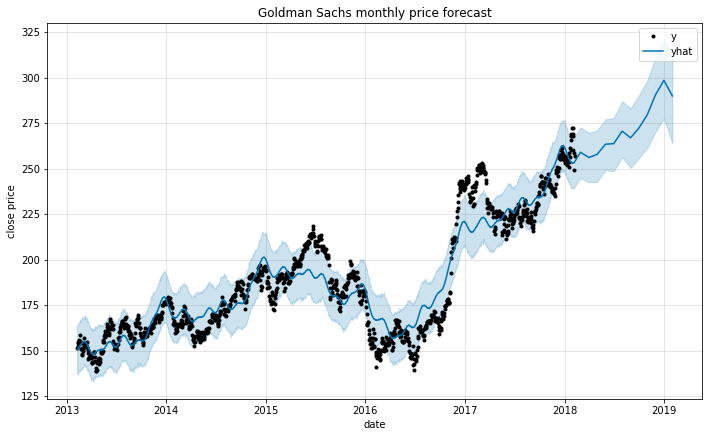

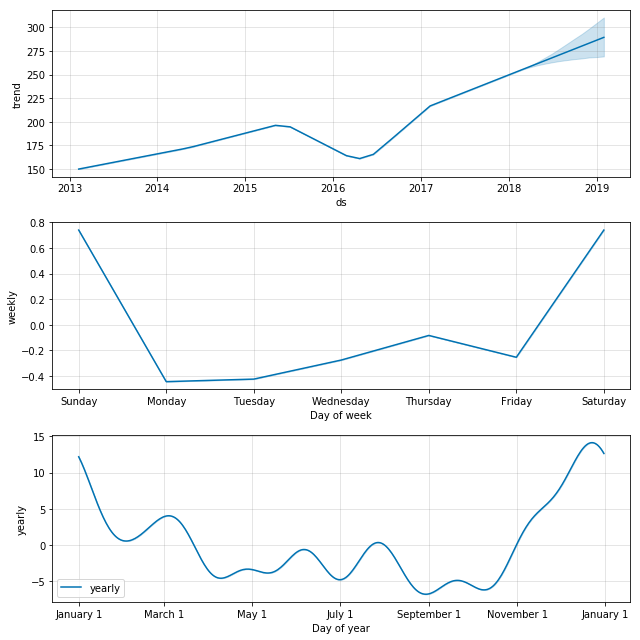

In [19]:
m.plot(gs_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Goldman Sachs monthly price forecast')
plt.legend()
plt.show()


m.plot_components(gs_fc)
plt.legend()
plt.show()

In [20]:
m = Prophet()
m.fit(fb_train)
fb_future = m.make_future_dataframe(periods = 365)
fb_fc = m.predict(fb_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



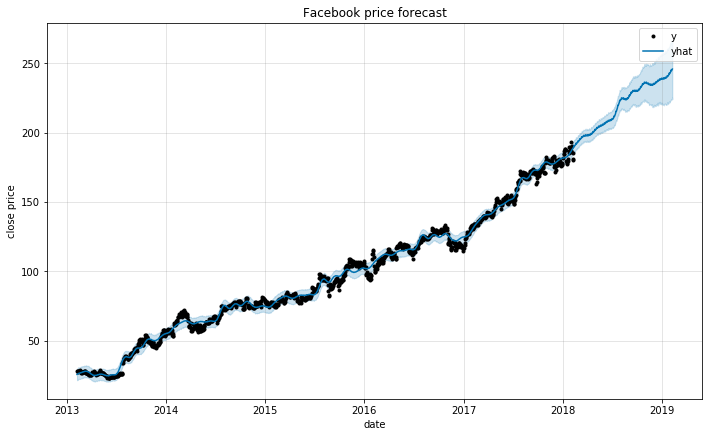

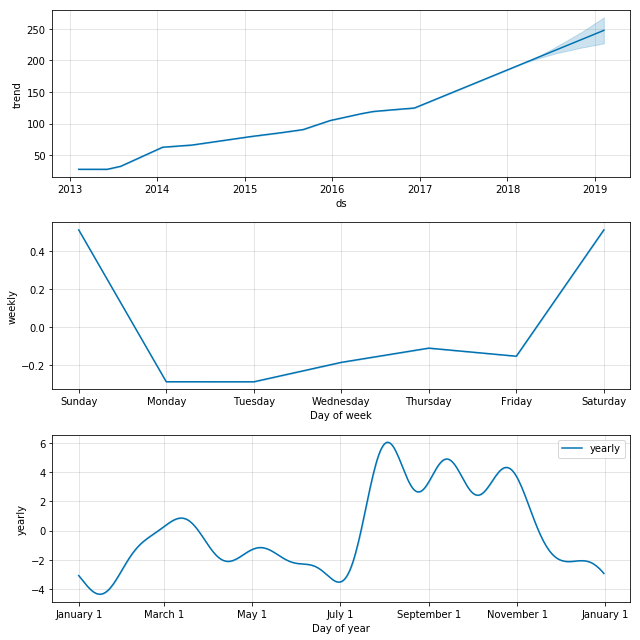

In [21]:
m.plot(fb_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Facebook price forecast')

plt.legend()
plt.show()


m.plot_components(fb_fc)
plt.legend()
plt.show()

In [22]:
m = Prophet(changepoint_prior_scale=0.01).fit(fb_train)
fb_future_month = m.make_future_dataframe(periods = 12, freq = 'M')
fb_fc = m.predict(fb_future_month)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



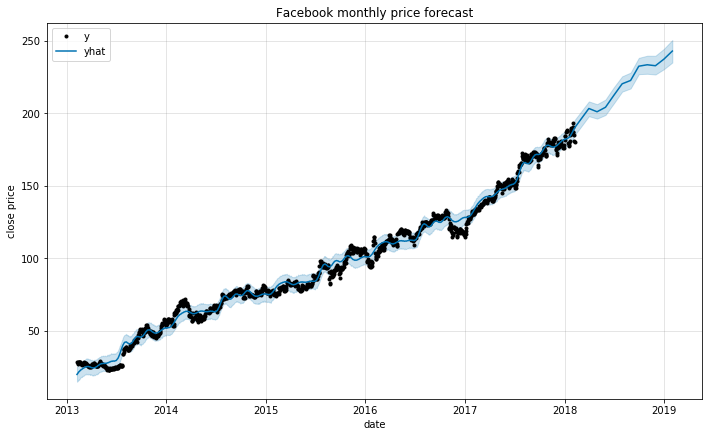

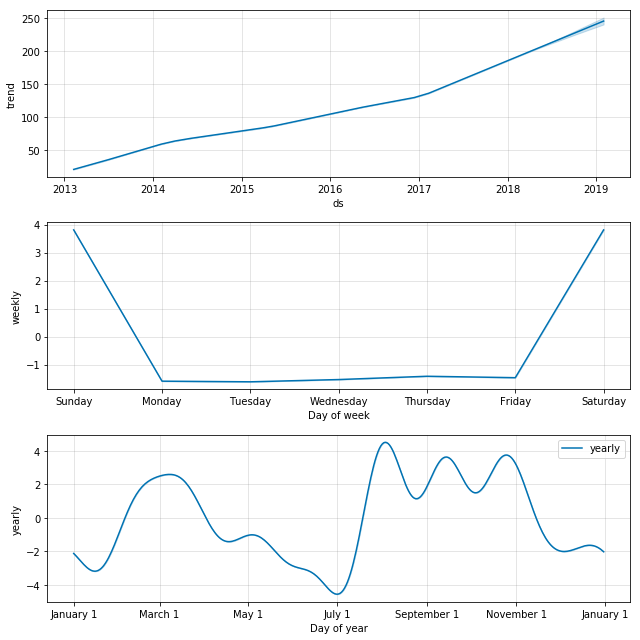

In [23]:
m.plot(fb_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Facebook monthly price forecast')
plt.legend()
plt.show()


m.plot_components(fb_fc)
plt.legend()
plt.show()

In [24]:
m = Prophet()
m.fit(ms_train)
ms_future = m.make_future_dataframe(periods = 365)
ms_fc = m.predict(ms_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



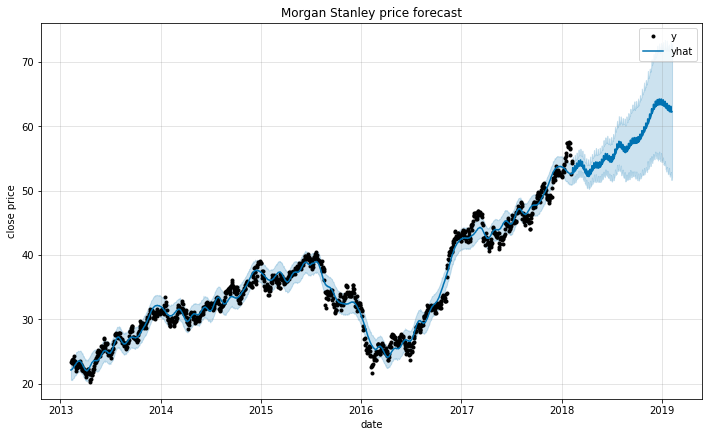

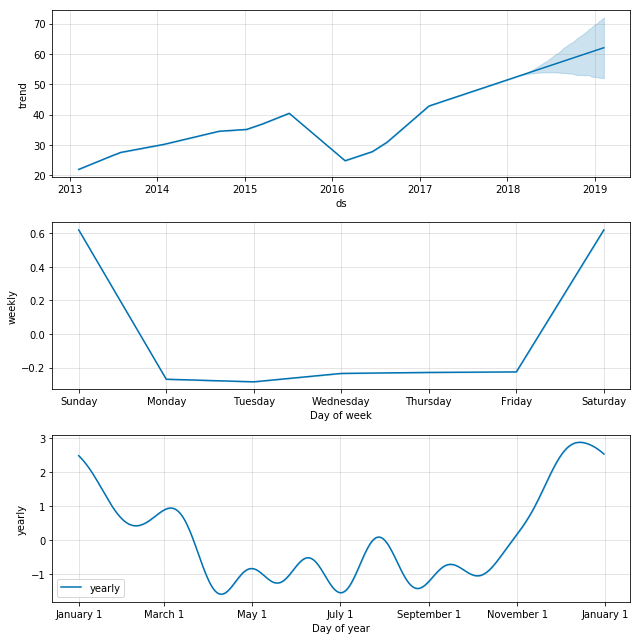

In [25]:
m.plot(ms_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Morgan Stanley price forecast')

plt.legend()
plt.show()


m.plot_components(ms_fc)
plt.legend()
plt.show()

In [26]:
m = Prophet(changepoint_prior_scale=0.01).fit(ms_train)
ms_future_month = m.make_future_dataframe(periods = 12, freq = 'M')
ms_fc = m.predict(ms_future_month)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



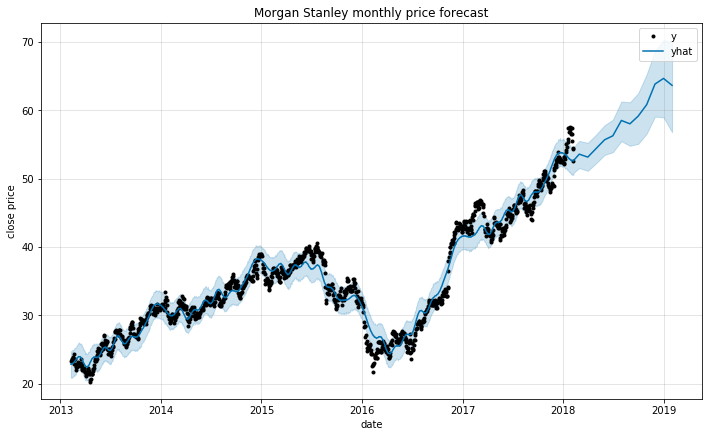

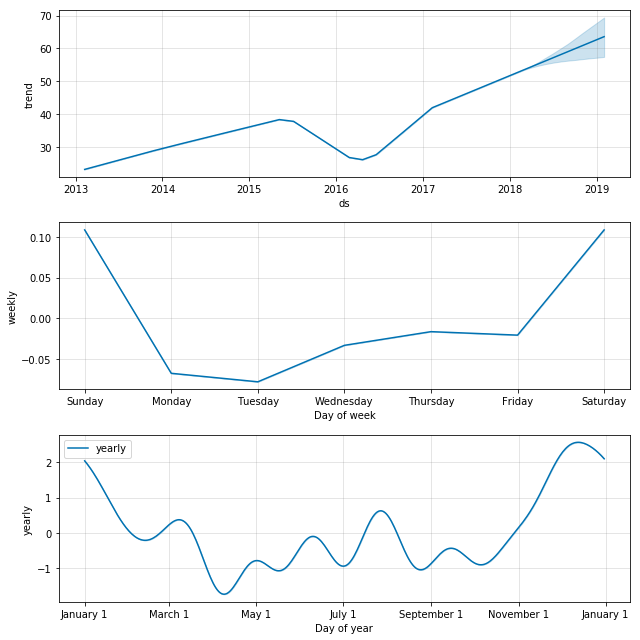

In [27]:
m.plot(ms_fc)
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Morgan Stanley monthly price forecast')
plt.legend()
plt.show()


m.plot_components(ms_fc)
plt.legend()
plt.show()